# Penyelesaian Soal Regresi dan Interpolasi

## SOAL 1: Regresi Kuadrat Terkecil
**Tujuan:** Menghitung nilai \( g \) menggunakan regresi linear dari data eksperimen.

**Langkah-langkah:**
1. Asumsikan model regresi: \( y = ax + b \), dengan \( y = T^2 \), \( x = L \).
2. Gunakan metode regresi linier kuadrat terkecil untuk menentukan nilai \( a \).
3. Hitung $ g = \frac{4\pi^2}{a} $.
4. Implementasikan dalam Python.


In [5]:
import numpy as np

# Data percobaan: panjang (m) dan periode (s)
L = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
T = np.array([0.90, 1.10, 1.25, 1.40, 1.55])
T2 = T**2

# Regresi linear y = a*x + b
a, b = np.polyfit(L, T2, 1)

# Hitung g
g = 4 * np.pi**2 / a
print(f"Nilai g (regresi): {g:.2f} m/s^2")

Nilai g (regresi): 10.03 m/s^2


## SOAL 2: Interpolasi Polinomial Derajat 4
**Tujuan:** Menghitung nilai \( g \) menggunakan interpolasi polinomial orde 4.

**Langkah-langkah:**
1. Gunakan interpolasi polinomial dengan 5 titik data (orde 4).
2. Dapatkan koefisien polinomial.
3. Estimasi \( a \) dari koefisien linier.
4. Hitung $\ g = \frac{4\pi^2}{a} $.


Prediksi T^2 pada L=0.45 m: 1.7535
Perkiraan nilai g: 10.1316 m/s^2


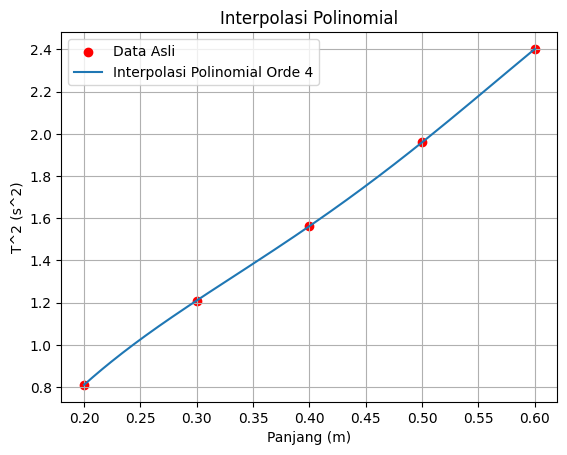

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Data
L = np.array([0.2, 0.3, 0.4, 0.5, 0.6])  # Panjang (m)
T = np.array([0.90, 1.10, 1.25, 1.40, 1.55])  # Periode (s)
T2 = T**2

# Interpolasi polinomial orde 4
p = Polynomial.fit(L, T2, deg=4)  # Polinomial derajat 4

# Misalnya kita ingin mencari g pada L = 0.45 m
L_target = 0.45
T2_pred = p(L_target)
g_pred = 4 * np.pi**2 * L_target / T2_pred

print(f"Prediksi T^2 pada L={L_target} m: {T2_pred:.4f}")
print(f"Perkiraan nilai g: {g_pred:.4f} m/s^2")

# Visualisasi
L_dense = np.linspace(0.2, 0.6, 200)
T2_interp = p(L_dense)

plt.scatter(L, T2, color='red', label='Data Asli')
plt.plot(L_dense, T2_interp, label='Interpolasi Polinomial Orde 4')
plt.xlabel('Panjang (m)')
plt.ylabel('T^2 (s^2)')
plt.title('Interpolasi Polinomial')
plt.legend()
plt.grid(True)
plt.show()


### Perbandingan:
- Regresi memberikan pendekatan terbaik (fit) secara global.
- Interpolasi menyesuaikan kurva ke semua titik (bisa overfitting).
- Hasilnya bisa sedikit berbeda tergantung sebaran data dan noise.
